### How to push to github
##### Write the following in the git terminal:
##### git add *
##### git commit -m "Write the changes in the file that were done here"
##### git push

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.special import kn
from scipy.integrate import quad
import csv
from scipy import optimize
from scipy import integrate
from scipy.integrate import odeint
import pandas as pd

In [4]:
%run CrossSectionFunctions.ipynb

# Particle properties
particle_mass = {
    'Proton': 120,
    'Lambda': 200,
    'Neutron': 100,
    'NeutralPion': 50,
    'ChargedPion': 60,
    'NeutralKaon': 80,
    'ChargedKaon': 90
}


particle_coupling_constants = {
    'NeutralPion': 5e-1
}

particle_ratios = {
    particle: particle_mass[particle] / particle_mass["Lambda"]
    for particle in particle_mass
}

linestyles = {
    "Proton": "-", 
    "Neutron": "--", 
    "Lambda": "-.", 
    "ChargedPion": ":", 
    "NeutralPion": (0, (3, 1, 1, 1)),  # Custom dash pattern
    "ChargedKaon": (0, (5, 2)), 
    "NeutralKaon": (0, (1, 1))
}

decay_products = {
    "Lambda": [("Neutron", "NeutralPion"), ("Proton", "ChargedPion")],
    "NeutralKaon": [("NeutralPion", "NeutralPion"), ("ChargedPion", "ChargedPion")],
    "ChargedKaon": [("ChargedPion", "NeutralPion"), 
                    ("ChargedPion", "ChargedPion", "NeutralPion"),
                    ("NeutralPion", "NeutralPion")]
}

Frozen-out value of Proton with sigma = 1e-08, and mass = 120 GeV is 2.2418259051148e-13
Frozen-out value of Neutron with sigma = 1e-08, and mass = 100 GeV is 3.2458635622843176e-13
Frozen-out value of Lambda with sigma = 1e-09, and mass = 200 GeV is 7.734751440119545e-14
Frozen-out value of NeutralPion with sigma = 1e-05, and mass = 50 GeV is 1.2731177885302448e-12
Frozen-out value of ChargedPion with sigma = 1e-05, and mass = 60 GeV is 9.160309227387376e-13
Frozen-out value of NeutralKaon with sigma = 1e-05, and mass = 80 GeV is 2.7341434979620174e-13
Frozen-out value of ChargedKaon with sigma = 1e-05, and mass = 90 GeV is 2.177904764242027e-13


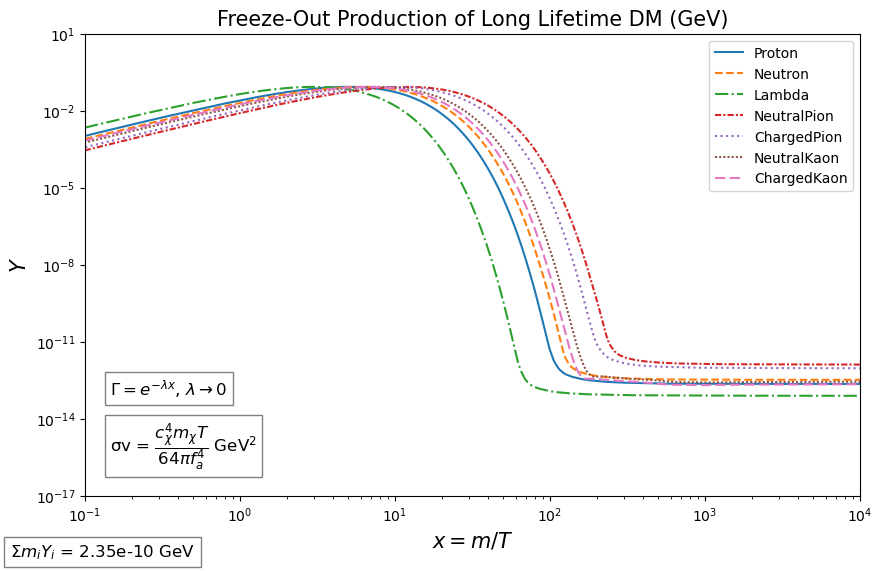

In [5]:
# Integration setup
particles = ["Proton", "Neutron", "Lambda", "NeutralPion", "ChargedPion", "NeutralKaon", "ChargedKaon"]

x_min, x_max = 1e-2, 1E4
x_eval = np.logspace(np.log10(x_min), np.log10(x_max), 10000)

# Plot equilibrium abundance
xx = np.logspace(np.log10(x_min), np.log10(1000), 10000)
#plt.loglog(xx, Y_EQ(xx, 'Proton'), 'c', label=r'$Y_{\rm eq}$, Proton')
plt.figure(figsize=(10, 6))


FreezeOutNumber = np.array([])
masses = np.array([])

for particle in particles:
    cross_section = particle_cross_sections.get(particle, 1)
    mass = particle_mass.get(particle, 1)
    
    #k = fkpractice(x,particle)

    sol = integrate.solve_ivp(
        lambda x, logY: dYdx_logdynamic(x, logY, particle),
        (x_min, x_max),
        [np.log(np.array(Y_EQ(x_min, particle)))],  
        method='BDF',  
        t_eval=x_eval,
        rtol=1e-2,
        atol=1e-2,
        jac = None
    )

    #print(sol.y)
    # Convert back from log space
    Y_values = np.exp(sol.y[0])

    print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y_values[-1]}')

    plt.loglog(sol.t, Y_values, label=f'{particle}',linestyle=linestyles.get(particle, "-"))

    FreezeOutNumber = np.append(FreezeOutNumber, Y_values[-1])
    masses = np.append(masses, mass)

#print('masses = ', masses)
#print('fz', FreezeOutNumber)
#print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')


plt.gcf().text(0.15, 0.15, r"σv = $\dfrac{c_{χ}^{4} m_χT}{64πf_a^4} $ GeV$^{2}$", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.gcf().text(0.15, 0.27, r"$\Gamma = e^{-\lambda x}$, $\lambda \rightarrow 0$", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.gcf().text(0.05, 0.001, rf"$\Sigma m_{{i}}Y_{{i}}$ = {format(np.sum(np.multiply(masses, FreezeOutNumber)), '.2e')} GeV", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.ylim(1E-17,10)
plt.xlim(0.1,x_max)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-Out Production of Long Lifetime DM (GeV)', size= 15)
plt.legend()
#plt.savefig('NonDecayingFreezeOut.png', facecolor = 'w')

### DECAYING PARTICLES

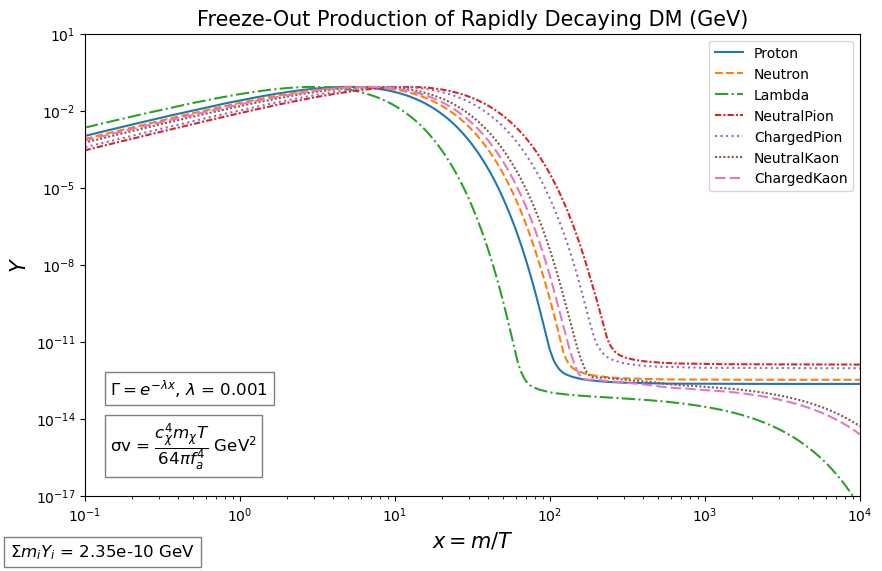

In [7]:
# Integration setup
particles = ["Proton", "Neutron", "Lambda", "NeutralPion", "ChargedPion", "NeutralKaon", "ChargedKaon"]

x_min, x_max = 1e-2, 1E4
x_eval = np.logspace(np.log10(x_min), np.log10(x_max), 10000)

# Plot equilibrium abundance
xx = np.logspace(np.log10(x_min), np.log10(1000), 10000)
#plt.loglog(xx, Y_EQ(xx, 'Proton'), 'c', label=r'$Y_{\rm eq}$, Proton')
plt.figure(figsize=(10, 6))


FreezeOutNumber = np.array([])
masses = np.array([])

for particle in particles:
    cross_section = particle_cross_sections.get(particle, 1)
    mass = particle_mass.get(particle, 1)
    
    #k = fkpractice(x,particle)

    sol = integrate.solve_ivp(
        lambda x, logY: dYdx_logdynamic(x, logY, particle),
        (x_min, x_max),
        [np.log(np.array(Y_EQ(x_min, particle)))],  
        method='BDF',  
        t_eval=x_eval,
        rtol=1e-2,
        atol=1e-2,
        jac = None
    )

    # Convert back from log space
    Y_values = np.exp(sol.y[0])
    
    if particle in ("Lambda", "NeutralKaon", "ChargedKaon"):
        Y_values_decay = Y_values*AvgDecayRate(x_eval)
        plt.loglog(sol.t, Y_values_decay, label=f'{particle}',linestyle=linestyles.get(particle, "-"))

    else:
        plt.loglog(sol.t, Y_values, label=f'{particle}',linestyle=linestyles.get(particle, "-"))

    FreezeOutNumber = np.append(FreezeOutNumber, Y_values[-1])
    masses = np.append(masses, mass)

#print('masses = ', masses)
#print('fz', FreezeOutNumber)
#print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')

plt.gcf().text(0.15, 0.15, r"σv = $\dfrac{c_{χ}^{4} m_χT}{64πf_a^4} $ GeV$^{2}$", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.gcf().text(0.15, 0.27, rf"$\Gamma = e^{{-\lambda x}}$, $\lambda$ = {DecayConstant}", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.gcf().text(0.05, 0.001, rf"$\Sigma m_{{i}}Y_{{i}}$ = {format(np.sum(np.multiply(masses, FreezeOutNumber)), '.2e')} GeV", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.ylim(1E-17,10)
plt.xlim(0.1,x_max)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-Out Production of Rapidly Decaying DM (GeV)', size= 15)
plt.legend()
#plt.savefig('RapidlyDecayingFreezeOut.png', facecolor = 'w')

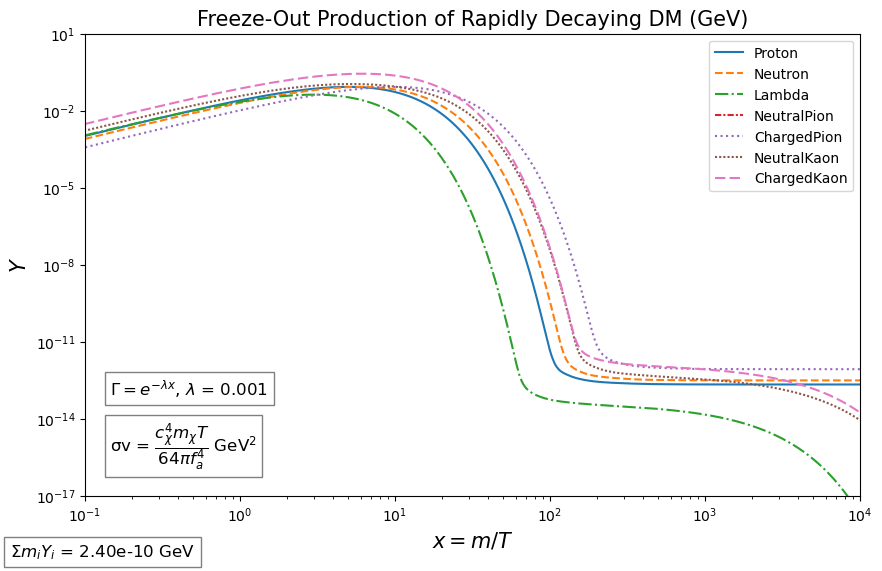

In [23]:
# Integration setup
particles = ["Proton", "Neutron", "Lambda", "NeutralPion", "ChargedPion", "NeutralKaon", "ChargedKaon"]

x_min, x_max = 1e-2, 1E4
x_eval = np.logspace(np.log10(x_min), np.log10(x_max), 10000)

# Plot equilibrium abundance
xx = np.logspace(np.log10(x_min), np.log10(1000), 10000)
#plt.loglog(xx, Y_EQ(xx, 'Proton'), 'c', label=r'$Y_{\rm eq}$, Proton')
plt.figure(figsize=(10, 6))


FreezeOutNumber = np.zeros((len(particles), len(x_eval)))

masses = np.array([])

for particle in particles:
    sol = integrate.solve_ivp(
        lambda x, logY: dYdx_logdynamicWithDecays(x, logY, particle),
        (x_min, x_max),
        [np.log(np.array(Y_EQ(x_min, particle)))],
        method='BDF',
        t_eval=x_eval,
        rtol=1e-3,
        atol=1e-3
    )
    
    Y_values = np.exp(sol.y[0])
    
    if particle in decay_products:
        Y_values_decay = Y_values * AvgDecayRate(x_eval)
        for products in decay_products[particle]:
            for product in products:
                idx = particles.index(product)
                FreezeOutNumber[idx, :] += 0.5 * Y_values_decay
        
        plt.loglog(sol.t, FreezeOutNumber[idx, :], label=f'{particle}',linestyle=linestyles.get(particle, "-"))

    else:
        plt.loglog(sol.t, Y_values, label=f'{particle}',linestyle=linestyles.get(particle, "-"))

    FreezeOutNumber[1, -1] = Y_values[-1]
    masses = np.append(masses, mass)

#print('masses = ', masses)
#print('fz', FreezeOutNumber)
#print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')

plt.gcf().text(0.15, 0.15, r"σv = $\dfrac{c_{χ}^{4} m_χT}{64πf_a^4} $ GeV$^{2}$", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.gcf().text(0.15, 0.27, rf"$\Gamma = e^{{-\lambda x}}$, $\lambda$ = {DecayConstant}", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
plt.gcf().text(0.05, 0.001, rf"$\Sigma m_{{i}}Y_{{i}}$ = {format(np.sum(np.multiply(masses, FreezeOutNumber[1,-1])), '.2e')} GeV", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

plt.ylim(1E-17,10)
plt.xlim(0.1,x_max)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-Out Production of Rapidly Decaying DM (GeV)', size= 15)
plt.legend()
#plt.savefig('RapidlyDecayingFreezeOut.png', facecolor = 'w')

Text(2.3, 1000.0, 'Vacuum Energy dominated universe')

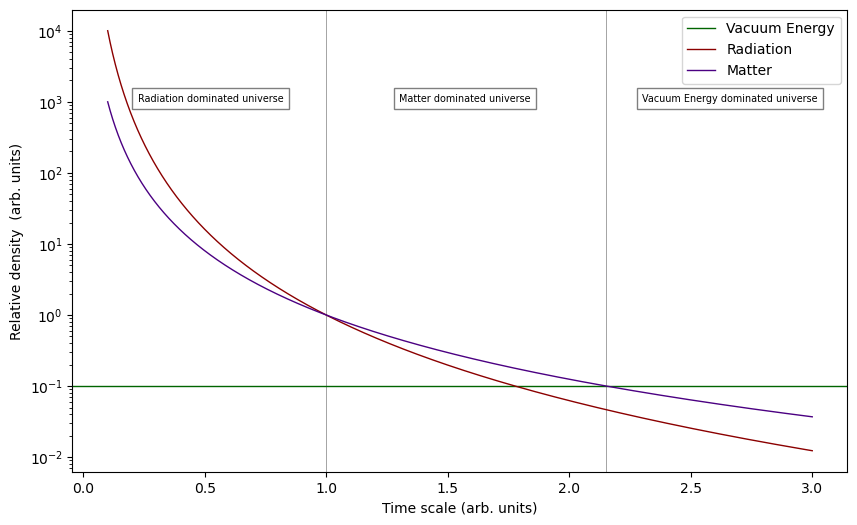

In [9]:
def lightdom(x):
    return x**(-4)

def matterdom(x):
    return x**(-3)

#plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(10, 6))

T_ex = np.linspace(0.1, 3, num = 10000)

Y_lightdom = lightdom(T_ex)
Y_matterdom = matterdom(T_ex)

plt.axvline(1, alpha = 0.5, linewidth = 0.5, color = 'black')
plt.axvline(2.15, alpha = 0.5, linewidth = 0.5, color = 'black')
plt.axhline(1e-1, linewidth = 1, color = 'darkgreen', label = 'Vacuum Energy')
plt.plot(T_ex,Y_lightdom, label = 'Radiation', color = 'darkred',linewidth = 1)
plt.plot(T_ex, Y_matterdom, label = 'Matter', color = 'indigo', linewidth = 1)
plt.legend()
plt.xlabel('Time scale (arb. units)')
plt.ylabel('Relative density  (arb. units)')
plt.yscale('log')
plt.text(1.3,1e3,"Matter dominated universe", bbox=dict(facecolor='white', alpha=0.5), size = 'x-small')
plt.text(0.225,1e3,"Radiation dominated universe", bbox=dict(facecolor='white', alpha=0.5), size = 'x-small')
plt.text(2.3,1e3,"Vacuum Energy dominated universe", bbox=dict(facecolor='white', alpha=0.5), size = 'x-small')

#plt.grid(linestyle = '--')
#plt.ylim(0,3)
#plt.savefig('TimeScaleArb.png')

In [10]:

"""
%run FreezeOutFunctions.ipynb
#%run CrossSectionFunctions.ipynb

particle_cross_sections = {
    'Proton': 2e-9,
    'Neutron': 3e-9,
    'Lambda': 1e-7,
    'NeutralPion': 4e-9,
    'ChargedPion': 5e-9,
    'NeutralKaon': 5e-9,
    'ChargedKaon': 6e-9,
}

particle_mass = {
    'Proton': 100,
    'NeutralPion': 1,
}

particle_coupling_constants = {
    'NeutralPion': 1e-1,
}

particles = ['Proton']#["Proton", "Neutron", "Lambda", "ChargedPion", "NeutralPion", "ChargedKaon", "NeutralKaon"]

xmax = 1e2

#plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8, 6))

x=np.logspace(np.log10(0.1),np.log10(xmax),10000)

FreezeOutNumber = np.array([])
masses = np.array([])

for particle in particles:
    #cross_section = particle_cross_sections.get(particle,1)
    mass = particle_mass.get(particle,1)
    
    Y=integrate.odeint(dYdx,Y_EQ(x[0], particle), x, args=(particle,))
    Decay_rate = AvgDecayRate(x)
    Y_New = Y.reshape(1,-1)
    
    if particle in ("Lambda", "NeutralKaon", "ChargedKaon"):
        Y_Decayed = np.multiply(Y_New,Decay_rate)
        Y_Decayed_New = Y_Decayed.reshape(-1,1)
        FreezeOutNumber = np.append(FreezeOutNumber,Y_Decayed_New[-1])
        #print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y_Decayed_New[-1]}')
        plt.loglog(x, Y_Decayed_New, label=f'{particle} σv = {cross_section}, m = {mass} GeV', linestyle=linestyles.get(particle, "-"))
        
    else:
        plt.loglog(x, Y, label=f'{particle}: m = {mass} GeV', linestyle=linestyles.get(particle, "-"))
        FreezeOutNumber = np.append(FreezeOutNumber,Y[-1])

        #print(f'Frozen-out value of {particle} with sigma = {cross_section}, and mass = {mass} GeV is {Y[-1]}')
    
    masses = np.append(masses, mass)

#print('Frozen-out values: ', FreezeOutNumber)
#print(f'Particle masses: {masses}')
#print('mult', np.multiply(masses,FreezeOutNumber))
print(f'Σm_i*Y_i = {np.sum(np.multiply(masses,FreezeOutNumber))} GeV')

plt.ylim(1e-10,1e2)
plt.xlim(1e-1,xmax)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('Freeze-out production of Atomic DM GeV', size= 15)
plt.legend()
plt.grid()
plt.gcf().text(0.02, 0.02, f"Σm_i*Y_i = {format(np.sum(np.multiply(masses, FreezeOutNumber)), '.2e')} GeV", fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))
#plt.savefig('Particles.png', facecolor = 'w')
"""

'\n%run FreezeOutFunctions.ipynb\n#%run CrossSectionFunctions.ipynb\n\nparticle_cross_sections = {\n    \'Proton\': 2e-9,\n    \'Neutron\': 3e-9,\n    \'Lambda\': 1e-7,\n    \'NeutralPion\': 4e-9,\n    \'ChargedPion\': 5e-9,\n    \'NeutralKaon\': 5e-9,\n    \'ChargedKaon\': 6e-9,\n}\n\nparticle_mass = {\n    \'Proton\': 100,\n    \'NeutralPion\': 1,\n}\n\nparticle_coupling_constants = {\n    \'NeutralPion\': 1e-1,\n}\n\nparticles = [\'Proton\']#["Proton", "Neutron", "Lambda", "ChargedPion", "NeutralPion", "ChargedKaon", "NeutralKaon"]\n\nxmax = 1e2\n\n#plt.rcParams[\'figure.dpi\'] = 300\nplt.figure(figsize=(8, 6))\n\nx=np.logspace(np.log10(0.1),np.log10(xmax),10000)\n\nFreezeOutNumber = np.array([])\nmasses = np.array([])\n\nfor particle in particles:\n    #cross_section = particle_cross_sections.get(particle,1)\n    mass = particle_mass.get(particle,1)\n    \n    Y=integrate.odeint(dYdx,Y_EQ(x[0], particle), x, args=(particle,))\n    Decay_rate = AvgDecayRate(x)\n    Y_New = Y.reshape